# An Introduction to Gradient Boosting Decision Trees

For understanding the underlying principles and working of gradient boosting decision trees, it's important to first learn the basic concepts of decision trees and ensemble learning.

## Decision trees

A decision tree is a machine learning model that builds upon iteratively asking questions to partition data and reach a solution. It is the most intuitive way to zero in on a classification or label for an object. Visually too, it resembles and upside down tree with protruding branches and hence the name.

For example if you went hiking, and saw a animal that you couldnt immediately recognise through its features. You could later come home and ask yourself a set of questions about its features which could help you decide what excat species of animal did you notice. A decision tree for this problem would look something like this.

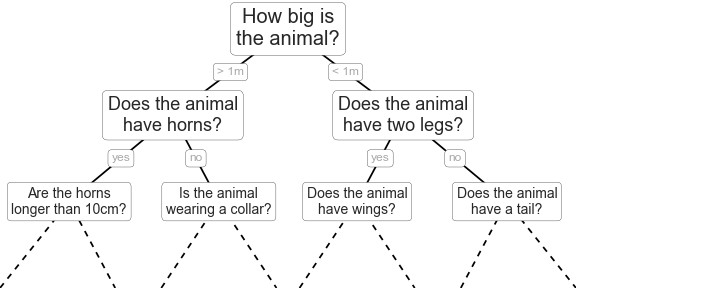

The major problem with decision trees is overfitting, which is why they will perform well on the validation dataset but will have poor accuracy on the test dataset. To overcome this issue posed by decision trees, data scientists came up with _ensemble learning_.

## Ensemble Learning

Ensemble learning, in general, is a model that makes predictions based on a number of different models. By a combining a number of different models, an ensemble learning tends to be more flexible (less bias) and less data sensitive (less variance).

The two most popular ensemble learning methods are bagging and boosting.
1. _Bagging_ : Training a bunch of models in parallel way. Each model learns from a random subset of the data.

2. _Boosting_ : Traning a bunch of models sequentially. Each model learns from the mistakes of the previous model.

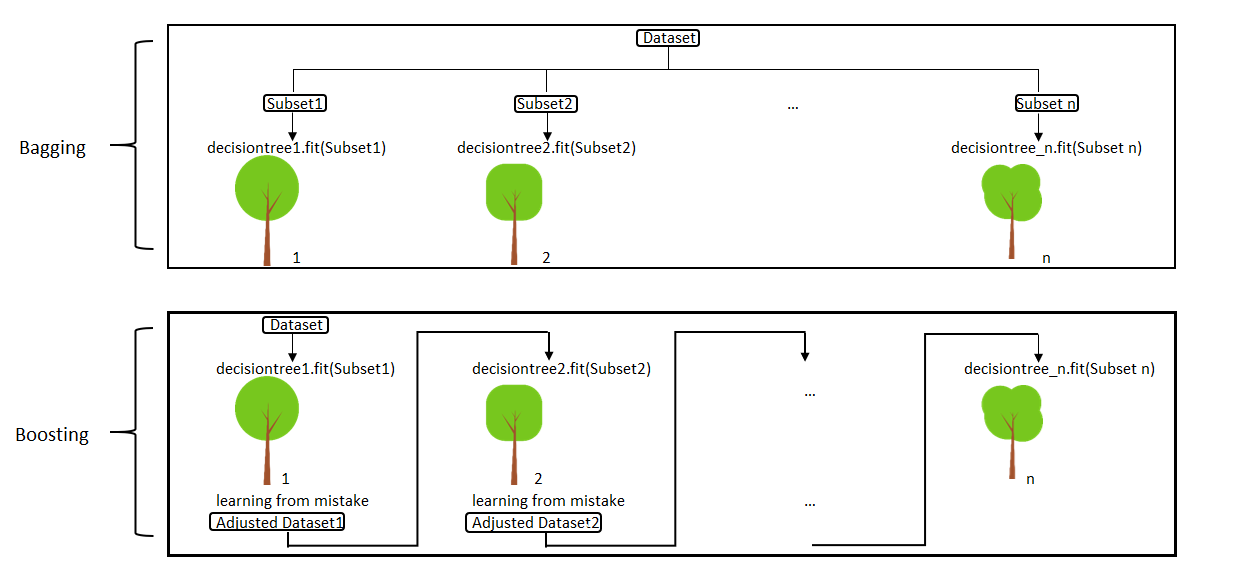

The application of bagging is found in **Random Forests**. Random forests are a parallel combination of decision trees. Each tree is trained on random subset of the same data and the results from all trees are averaged to find the classification.

The application of boosting is found in **Gradient Boosting Decision Trees**, about which we are going to discuss in more detail.

## Gradient Boosting Decision Trees

In gradient boosting decision trees, we combine many weak learners to come up with one strong learner. The weak learners here are the individual decision trees.
All the trees are conncted in series and each tree tries to minimise the error of the previous tree. Due to this sequential connection, boosting algorithms are usually slow to learn, but also highly accurate. In statistical learning, models that learn slowly perform better.

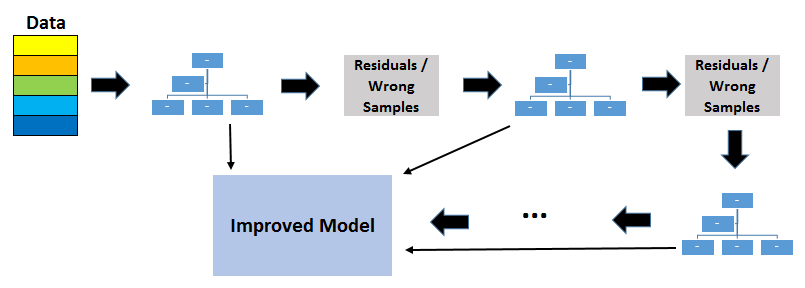

The weak learners are fit in such a way that each new learner fits into the residuals of the previous step so as the model improves. The final model aggregates the result of each step and thus a strong learner is achieved.
A loss function is used to detect the residuals. For instance, mean squared error (MSE) can be used for a regression task and logarithmic loss (log loss) can be used for classification tasks. It is worth noting that existing trees in the model do not change when a new tree is added. The added decision tree fits the residuals from the current model. The steps are as follows.

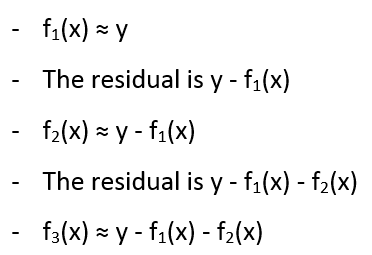

#### Learning rate and n_estimators (Hyperparameters)

Hyperparemetes are key parts of learning algorithms which effect the performance and accuracy of a model. Learning rate and n_estimators are two critical hyperparameters for gradient boosting decision trees. Learning rate, denoted as α, simply means how fast the model learns. Each tree added modifies the overall model. The magnitude of the modification is controlled by learning rate. The steps of gradient boosted decision tree algorithms with learning rate introduced:

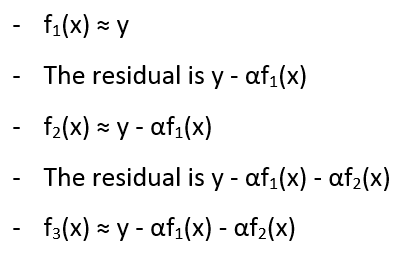

The lower the learning rate, the slower the model learns. The advantage of slower learning rate is that the model becomes more robust and efficient. In statistical learning, models that learn slowly perform better. However, learning slowly comes at a cost. It takes more time to train the model which brings us to the other significant hyperparameter. n_estimator is the number of trees used in the model. If the learning rate is low, we need more trees to train the model. However, we need to be very careful at selecting the number of trees. It creates a high risk of overfitting to use too many trees.

##### Note:

One problem that we may encounter in gradient boosting decision trees but not random forests is overfitting due to addition of too many trees. In random forests, addition of too many tress wont cause overfitting. The accuracy of the model doesn't improve after a certain point but no problem of overfitting is faced.
On the other hand, in gradient boosting decision trees we have to be careful about the number of trees we select, because having too many weak learners in the model may lead to overfitting of data.

Therefore, gradient boositng decision trees require a very careful tuning of the hyperparameters.

## Gradient Boosting - In Action :


Till now, we have seen how gradient boosting works in theory. Now, we will dive into the maths and logic behind it, discuss the algorithm of gradient boosting and make a python program that applies this algorithm to real time data.

First let's go over the basic principle behind gradient boosting once again. We are given data with features (say x) and targets (say y). Our main aim is to predict a y given a set of x. The difference between our prediction and the actual value is known as the residual (or in this case, pseudo residuals), on the basis of which the gradient boosting builds successive trees.

### _Algorithm:_

_Input_ - 
1. Training set = 

    The x and y denote the data given to us. x is the feature variables that we use to predict the y, our target.

2. Loss function = 

   The loss function in the case of a regression is mean squared error (MSE), which is the square of residual, (Observed target value - Predicted target value). As shown above in the function expression as well, it depends on 'y' (observed value of target) and F(x) (predicted value of target using feature variables 'x')
3. Number of iterations = M

_Step 1_ -

Initialise the model with a constant value : 

y{i} is the observed value for i-th observation while gamma is the predicted value for that observation. argmin denotes that we find predicted values that minimize the sum of loss function for each i. 

_Step 2_ -

For m = 1 to M,

**a.** Compute the pseudo residuals 

r{im} is the pseudo residual for i-th observation and m-th iteration. It is computed by calculating the derivative of loss function w.r.t to the predicted value. The value of F(x) for each iteration is the value of F(x) obtained from the previous iteration.

**b.** Fit a base learner (or weak learner, e.g. tree)   to pseudo-  residuals, i.e. train it using the training set 

   **c.** Compute multiplier  i.e, the output value of each leaf in a gradient boosting tree by solving the following equation  which, as can be seen from the equation, also takes the previous output values into account.

**d.** Update the model: 
The final step is to make a prediction using the gradient boosting tree.

_Step 3_ -

Output : 

### _Implementation:_

Let’s consider simulated data as shown in scatter plot below with 1 input (x) and 1 output (y) variables.

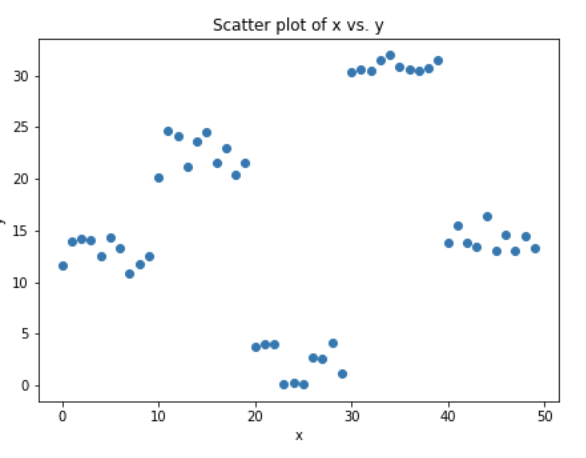

In [ ]:
#The above plot has been generated using the following code
x = np.arange(0,50)
x = pd.DataFrame({'x':x})

# just random uniform distributions in differnt range

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]

   1. Fit a decision tree on data. [call x as input and y as output]

In [ ]:
xi = x # initialization of input
yi = y # initialization of target
# x,y --> use where no need to change original y
ei = 0 # initialization of error
n = len(yi)  # number of rows
predf = 0 # initial prediction 0

for i in range(30): # loop will make 30 trees (n_estimators). 
    tree = DecisionTree(xi,yi) # DecisionTree scratch code can be found on www.kaggle.com/grroverpr/gradient-boosting-simplified 
                               # It just create a single decision tree with provided min. sample leaf
    tree.find_better_split(0)  # For selected input variable, this splits (<n and >n) data so that std. deviation of 
                               # target variable in both splits is minimum as compared to all other splits
    
    r = np.where(xi == tree.split)[0][0]   #  finds index where this best split occurs
    
    left_idx = np.where(xi <= tree.split)[0] # index lhs of split
    right_idx = np.where(xi > tree.split)[0] # index rhs of split

2. Calculate error residuals. Actual target value, minus predicted target value [e1= y - y_predicted1 ]

3. Fit a new model on error residuals as target variable with same input variables [call it e1_predicted]

4. Add the predicted residuals to the previous predictions
[y_predicted2 = y_predicted1 + e1_predicted]

5. Fit another model on residuals that is still left. i.e. [e2 = y - y_predicted2] and repeat steps 2 to 5 until it starts overfitting or the sum of residuals become constant. Overfitting can be controlled by consistently checking accuracy on validation data.

In [ ]:
# predictions by ith decisision tree
    
    predi = np.zeros(n)
    np.put(predi, left_idx, np.repeat(np.mean(yi[left_idx]), r))  # replace left side mean y
    np.put(predi, right_idx, np.repeat(np.mean(yi[right_idx]), n-r))  # right side mean y
    
    predi = predi[:,None]  # make long vector (nx1) in compatible with y
    predf = predf + predi  # final prediction will be previous prediction value + new prediction of residual
    
    ei = y - predf  # needed originl y here as residual always from original y    
    yi = ei # update yi as residual to reloop

The code above is a very basic implementation of gradient boosting trees. The actual libraries have a lot of hyperparameters that can be tuned for better results.

The discussion above is just the tip of iceberg when it comes to gradient boosting. The underlying concepts can be understood in more detail by starting with the very basics of machine learning algorithms and understanding the working of python code.
This however gives us the basic idea behind gradient boosting and its underlying working principles.

----